## **ROC–AUC Tutorial with Dummy TCR Data**

This Colab notebook teaches ROC curve and AUC using **dummy TCR data**.  
We will run two examples:
- **Binary**: Does a TCR bind an antigen? (Yes / No)  
- **Multi-class**: Which antigen does the TCR bind? (Flu / Cancer / Other)

Everything is explained in simple language and code is ready to run step-by-step.


## 📁 Files & How to upload

Files included / expected:
- `binary_tcr_dummy.csv` — dummy binary data (bind = 0 / 1)
- `multiclass_tcr_dummy.csv` — dummy multiclass data (classes 0,1,2)

**How to upload (choose one):**
1. Use the left sidebar **Files** → Upload (drag & drop CSVs).  
2. Or run the upload code cell below to pick files from your computer.


In [ ]:
# Run this cell to upload files interactively to Colab (choose the CSVs you downloaded)
from google.colab import files
uploaded = files.upload()   # a file picker will open
print("Uploaded files:", list(uploaded.keys()))


Saving binary_tcr_dummy.csv to binary_tcr_dummy (1).csv
Uploaded files: ['binary_tcr_dummy (1).csv']


## 🔎 Where files are after upload

After you upload with the cell above, files will be in the Colab working folder (`/content`).  
You can list files with: `!ls -la` (run the next code cell if you want).


In [ ]:
# Optional: show current files in /content
!ls -la


total 224
drwxr-xr-x 1 root root  4096 Sep 10 07:13  .
drwxr-xr-x 1 root root  4096 Sep 10 07:03  ..
-rw-r--r-- 1 root root 98432 Sep 10 07:13 'binary_tcr_dummy (1).csv'
-rw-r--r-- 1 root root 98432 Sep 10 07:13  binary_tcr_dummy.csv
drwxr-xr-x 4 root root  4096 Sep  8 13:41  .config
-rw-r--r-- 1 root root  2620 Sep 10 07:08 'dummy_tcr_data auc roc (1).pdf'
-rw-r--r-- 1 root root  2620 Sep 10 07:04 'dummy_tcr_data auc roc.pdf'
drwxr-xr-x 1 root root  4096 Sep  8 13:41  sample_data


## 🧪 Binary example — TCR binds or not

We will:
1. Load `binary_tcr_dummy.csv`  
2. Train Logistic Regression and Random Forest  
3. Plot ROC curves and print AUC values


**Binary example code **

In [ ]:
# ================================
# 📚 Importing Libraries
# ================================

# Numpy → For numerical operations (arrays, math)
import numpy as np

# Pandas → For handling datasets (like CSV files with TCR features and labels)
import pandas as pd

# Matplotlib → For plotting ROC curve (visualization)
import matplotlib.pyplot as plt

# Scikit-learn (sklearn) → Machine learning toolkit
# - train_test_split → split dataset into training and testing parts
# - LogisticRegression → classification model (baseline ML method)
# - RandomForestClassifier → another classifier (tree-based, powerful baseline)
# - roc_curve, auc → functions to calculate ROC curve and AUC value
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


In [ ]:
# ================================
# 📂 Load Binary TCR Dummy Data
# ================================

# Read the CSV file (make sure you uploaded binary_tcr_dummy.csv in Colab)
df = pd.read_csv('/content/binary_tcr_dummy.csv')

# Show first 5 rows to check data
print("Preview of the dataset:")
display(df.head())

# ================================
# 🧩 Split features (X) and labels (y)
# ================================
# Features (X) = all columns starting with 'feat_'
# Label (y) = 'label' column (1 = TCR binds antigen, 0 = does not bind)

X = df[[c for c in df.columns if c.startswith('feat_')]].values
y = df['label'].values

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)


Preview of the dataset:


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,label
0,0.993467,1.071200,0.592567,-4.013418,0.580673,2.148556,-1.366858,0.450574,-2.844779,-0.750818,1
1,0.596767,-1.768261,-0.497571,0.401488,-1.447445,1.525944,1.001825,-0.280734,1.030338,0.720285,0
2,0.673822,0.201179,0.418206,4.157154,2.079148,-5.576297,0.425844,0.558792,1.682833,0.009492,1
3,-2.064306,-2.427503,1.303508,-2.947792,-1.848508,4.262309,-0.975366,-0.508084,-0.501280,-1.112228,0
4,2.566200,0.234737,-0.224319,-2.482649,1.162774,-0.294132,1.311167,0.514352,-1.985557,-1.785654,1


Shape of X (features): (500, 10)
Shape of y (labels): (500,)


**Binary ROC–AUC (Step 3: Split & Train Models)**

In [ ]:
# ================================
# 🔀 Split data into Train and Test
# ================================
# Train = 80% data (to teach model)
# Test = 20% data (to check if model really learned)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# ================================
# 🤖 Train two models
# ================================
# Logistic Regression → simple linear model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Random Forest → many decision trees combined
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Models trained successfully!")


Training set size: 400
Testing set size: 100
✅ Models trained successfully!


**Binary ROC–AUC (Step 4: Predictions + Plot)**

AUC Logistic Regression: 0.876
AUC Random Forest: 0.974


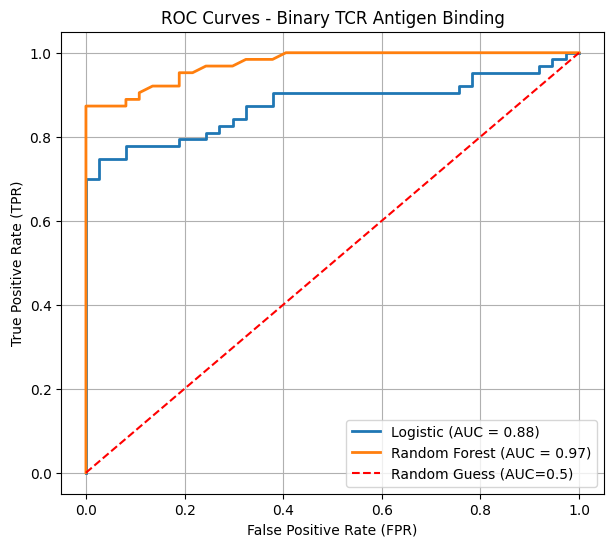

In [ ]:
# ================================
# 📊 Predictions & ROC–AUC
# ================================

# 1. Get predicted probabilities for the positive class (bind = 1)
y_score_log = logistic_model.predict_proba(X_test)[:, 1]
y_score_rf  = rf_model.predict_proba(X_test)[:, 1]

# 2. Compute ROC curve and AUC for both models
fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_score_rf)

auc_log = auc(fpr_log, tpr_log)
auc_rf  = auc(fpr_rf, tpr_rf)

# Print numeric AUC values
print("AUC Logistic Regression:", round(auc_log, 3))
print("AUC Random Forest:", round(auc_rf, 3))

# 3. Plot ROC curves
plt.figure(figsize=(7,6))

# Logistic ROC curve
plt.plot(fpr_log, tpr_log, label=f'Logistic (AUC = {auc_log:.2f})', lw=2)

# Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', lw=2)

# Random guessing baseline (diagonal line)
plt.plot([0,1],[0,1],'r--', label='Random Guess (AUC=0.5)')

# Formatting the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves - Binary TCR Antigen Binding')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


✅ Final Understanding

Goal achieved: We learned how to compute and interpret ROC–AUC for binary classification.

Models compared: Random Forest performed much better than Logistic Regression.

Takeaway: ROC–AUC is a reliable way to measure how well models can distinguish binders vs non-binders.

# MULTICLASS TCR DUMMY DATA

In [ ]:
# ================================
# 📚 Importing Libraries (Multi-class)
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize   # convert class labels to one-hot (needed for ROC multi-class)
from sklearn.multiclass import OneVsRestClassifier # train "one class vs all" models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from itertools import cycle   # for assigning colors to plots


**📘 Step 2: Load Dataset & Prepare Features**

In [ ]:
# ================================
# 📂 Load Multi-class TCR Dummy Data
# ================================

# Load dataset (make sure you uploaded multiclass_tcr_dummy.csv in Colab)
df = pd.read_csv('/content/multiclass_tcr_dummy.csv')

print("Preview of multiclass TCR dataset:")
display(df.head())

# Features (X) = all feat_ columns
# Labels (y) = class number (0 = Flu, 1 = Cancer, 2 = Other)
X = df[[c for c in df.columns if c.startswith('feat_')]].values
y = df['label'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# ================================
# 🔄 Convert labels into binary matrix
# ================================
# Example: if classes = [0,1,2], then:
# 0 → [1,0,0]
# 1 → [0,1,0]
# 2 → [0,0,1]

y_bin = label_binarize(y, classes=np.unique(y))
print("Shape of y after binarization:", y_bin.shape)


Preview of multiclass TCR dataset:


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,label
0,-2.595562,1.693058,-0.278501,-2.837506,1.146028,-1.775526,-0.722551,0.806301,0.665971,1.073000,1
1,-0.302002,-2.644203,3.303382,1.638360,0.618886,1.733587,-1.353430,-0.440166,1.612808,-1.726261,1
2,-2.063169,0.888008,-2.555006,0.721903,-0.665422,1.693522,1.959605,-0.929328,-3.121869,1.905552,1
3,-2.848489,2.037901,0.754878,-0.252763,-1.183056,-1.792442,2.212376,0.305339,-0.493342,-0.711954,1
4,1.169741,-0.436976,0.948244,1.447306,0.506241,-1.646986,1.737148,-1.747153,0.073100,-2.702289,0


Shape of X: (600, 10)
Shape of y: (600,)
Shape of y after binarization: (600, 3)


**(Multi-class Step: train, evaluate & plot)**

Train samples: 420 Test samples: 180
Model trained (One-vs-Rest Logistic Regression).
Class 0 AUC = 0.820
Class 1 AUC = 0.796
Class 2 AUC = 0.832


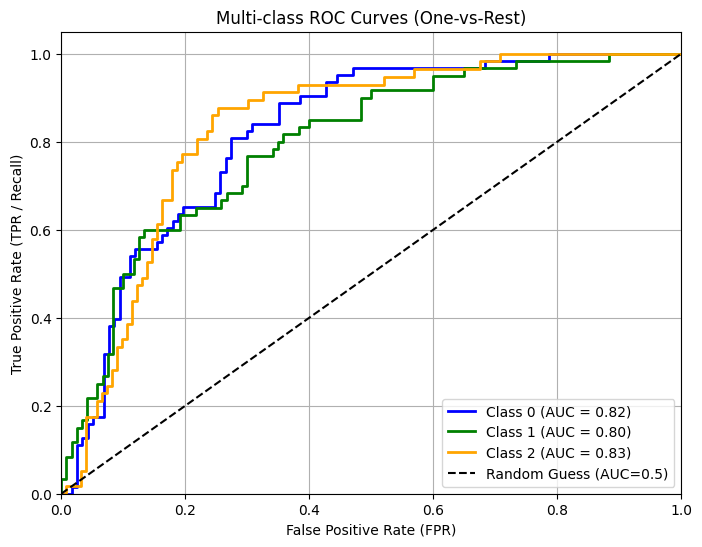

In [ ]:
# ================================
# 🔀 Train / Evaluate / Plot (Multi-class)
# ================================

# 1) Train-test split (use same random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.30, random_state=42)

print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

# 2) Fit One-vs-Rest Logistic Regression
#    One-vs-Rest trains one binary classifier per class: class_i vs rest
ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
ovr.fit(X_train, y_train)
print("Model trained (One-vs-Rest Logistic Regression).")

# 3) Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_train.shape[1]   # number of antigen classes (e.g., 3)

for i in range(n_classes):
    # predict_proba gives probability for class i (positive class) for each test sample
    y_score = ovr.predict_proba(X_test)[:, i]
    # compute fpr, tpr for the binary problem: class i vs rest
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"Class {i} AUC = {roc_auc[i]:.3f}")

# 4) Plot ROC curves for all classes
colors = cycle(['blue', 'green', 'orange', 'purple', 'cyan'])  # add more if many classes
plt.figure(figsize=(8,6))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# random guess baseline
plt.plot([0,1], [0,1], 'k--', lw=1.5, label='Random Guess (AUC=0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('Multi-class ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
